# Libs

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# K-means baseline

In [5]:


# Carregando os dados
X = df.drop('species', axis=1)
y = df['species']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', algorithm='full')
kmeans.fit(X_train)

# Realizando a predição no conjunto de teste
y_pred = kmeans.predict(X_test)

# Avaliando o desempenho do modelo (opcional)
score = kmeans.score(X_test)  # Avalia a inércia do modelo no conjunto de teste

# Outras métricas de avaliação podem ser utilizadas, dependendo do problema

# Exemplo de impressão do resultado
print("Score do modelo:", score)
print('-'*100)
unique_elements, counts = np.unique(kmeans.labels_, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Elemento {element}: {count} ocorrências")




c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Score do modelo: -23.441432256420875
----------------------------------------------------------------------------------------------------
Elemento 0: 29 ocorrências
Elemento 1: 31 ocorrências
Elemento 2: 45 ocorrências


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Dados padronizados

In [7]:
# Cria o padronizador dos dados
padronizador = StandardScaler()


In [8]:


# Carregando os dados
X = df.drop('species', axis=1)
y = df['species']

# Aplica o padronizador somente nas colunas de interesse
dados_padronizados = padronizador.fit_transform(X)


# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', algorithm='full')
kmeans.fit(X_train)

# Realizando a predição no conjunto de teste
y_pred = kmeans.predict(X_test)

# Avaliando o desempenho do modelo (opcional)
score = kmeans.score(X_test)  # Avalia a inércia do modelo no conjunto de teste

# Outras métricas de avaliação podem ser utilizadas, dependendo do problema

# Exemplo de impressão do resultado
print("Score do modelo:", score)
print('-'*100)
unique_elements, counts = np.unique(kmeans.labels_, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Elemento {element}: {count} ocorrências")




Score do modelo: -23.441432256420875
----------------------------------------------------------------------------------------------------
Elemento 0: 29 ocorrências
Elemento 1: 31 ocorrências
Elemento 2: 45 ocorrências


c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


# Elbow Method

In [115]:
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

In [116]:
calculate_wcss(X)

[152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.064593073593073,
 28.332569264069267,
 25.972596377306907,
 24.721484033896964,
 22.739761572370437,
 21.25704709875608,
 20.400203661327232,
 18.880291848502377,
 18.132302726513256,
 17.30083008658009,
 16.38452867965368,
 16.01317495657937,
 14.829987734487739]

In [117]:
np.arange(1, 20)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

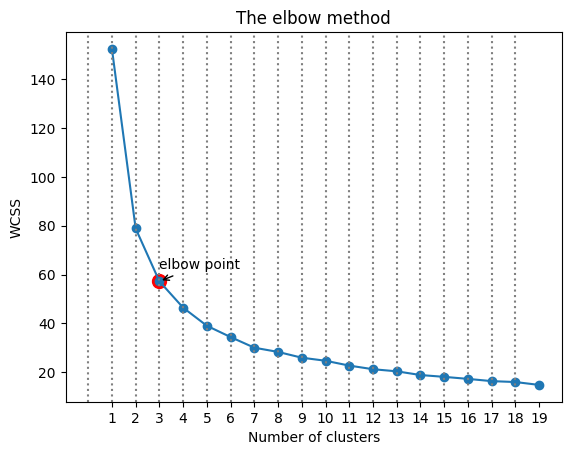

In [148]:
lista = np.arange(1, 20)
wcss = calculate_wcss(X)
plt.plot(lista, calculate_wcss(X), marker='o')
plt.xticks(lista)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

# Adicionando linhas pontilhadas no eixo x
for i in range(len(lista)):
    plt.axvline(x=i, linestyle='dotted', color='gray')

# plt.annotate(
#     'elbow point', (2, lista[2]), xytext=(2, lista[2]+1), color='red',
#     arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.scatter(3, calculate_wcss(X)[2], color='red', s=100)
plt.annotate('elbow point', xy=(3, wcss[2]), xytext=(3, wcss[2] + 5), arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

In [11]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [95]:
optimal_number_of_clusters(calculate_wcss(X))

5

In [13]:


# Carregando os dados
X = df.drop('species', axis=1)
y = df['species']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando e treinando o modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', algorithm='full')
kmeans.fit(X_train)

# Realizando a predição no conjunto de teste
y_pred = kmeans.predict(X_test)

# Avaliando o desempenho do modelo (opcional)
score = kmeans.score(X_test)  # Avalia a inércia do modelo no conjunto de teste

# Outras métricas de avaliação podem ser utilizadas, dependendo do problema

# Exemplo de impressão do resultado
print("Score do modelo:", score)
print('-'*100)
unique_elements, counts = np.unique(kmeans.labels_, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Elemento {element}: {count} ocorrências")




Score do modelo: -14.346575548670891
----------------------------------------------------------------------------------------------------
Elemento 0: 22 ocorrências
Elemento 1: 31 ocorrências
Elemento 2: 10 ocorrências
Elemento 3: 16 ocorrências
Elemento 4: 26 ocorrências


c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


# Plotando os clusters

In [14]:
clusters = kmeans.fit_predict(X)
X['clusters'] = clusters
X

c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


C:\Users\feh_s\AppData\Local\Temp\ipykernel_13264\1456906249.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette=palette, ax=axes[0])


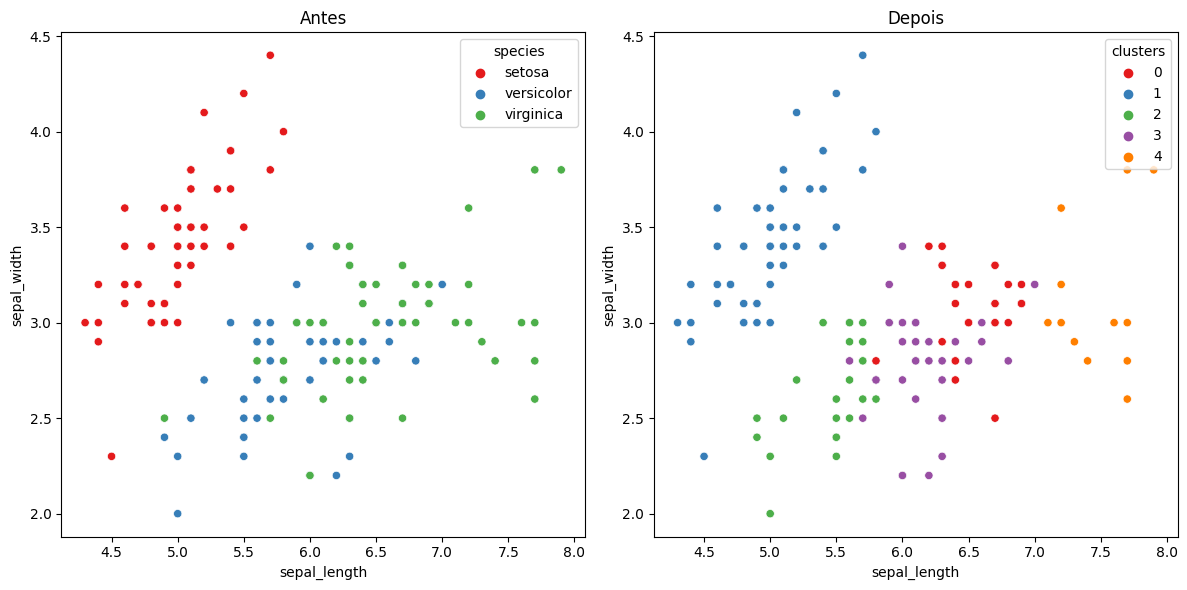

In [15]:
# Configuração da figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Definindo a paleta de cores
palette = sns.color_palette("Set1", n_colors=len(X["clusters"].unique()))


# Primeiro gráfico "Antes"
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species", palette=palette, ax=axes[0])
axes[0].set_title("Antes")


# Segundo gráfico "Depois"
sns.scatterplot(data=X, x="sepal_length", y="sepal_width", hue="clusters", palette=palette, ax=axes[1])
axes[1].set_title("Depois")


plt.tight_layout()
plt.show()


# Código do cara

In [16]:
import seaborn as sns

iris = sns.load_dataset('iris')

import seaborn as sns

from sklearn.cluster import KMeans


# preparando nossos dados
iris = sns.load_dataset('iris')
df = iris.drop('species', axis=1)

# calculando a soma dos quadrados para as 19 quantidade de clusters
sum_of_squares = calculate_wcss(df)

# calculando a quantidade ótima de clusters
n = optimal_number_of_clusters(sum_of_squares)

# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df)

df['clusters'] = clusters

# Exemplo de impressão do resultado
print("Score do modelo:", score)
print('-'*100)
unique_elements, counts = np.unique(kmeans.labels_, return_counts=True)

for element, count in zip(unique_elements, counts):
    print(f"Elemento {element}: {count} ocorrências")


c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\feh_s\DSA_powerBI\DSA_powerBI\my_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: 

Score do modelo: -14.346575548670891
----------------------------------------------------------------------------------------------------
Elemento 0: 38 ocorrências
Elemento 1: 50 ocorrências
Elemento 2: 62 ocorrências


C:\Users\feh_s\AppData\Local\Temp\ipykernel_13264\2394833429.py:9: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", palette=palette, ax=axes[0])
C:\Users\feh_s\AppData\Local\Temp\ipykernel_13264\2394833429.py:14: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="clusters", palette=palette, ax=axes[1])


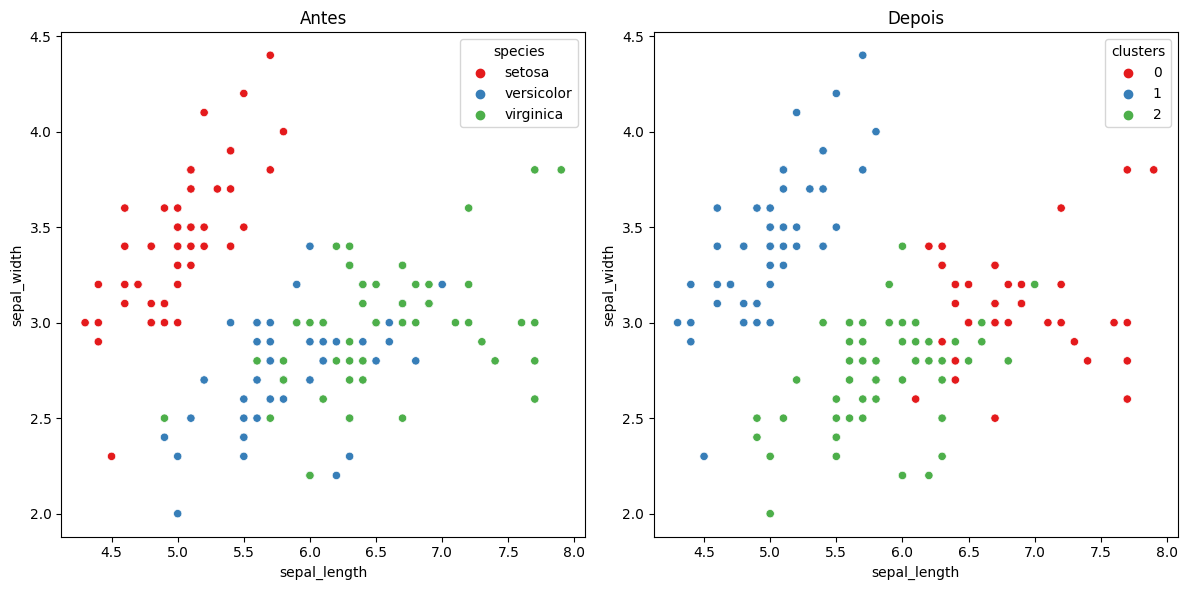

In [17]:
# Configuração da figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Definindo a paleta de cores
palette = sns.color_palette("Set1", n_colors=len(X["clusters"].unique()))


# Primeiro gráfico "Antes"
sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", palette=palette, ax=axes[0])
axes[0].set_title("Antes")


# Segundo gráfico "Depois"
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="clusters", palette=palette, ax=axes[1])
axes[1].set_title("Depois")


plt.tight_layout()
plt.show()


In [18]:
iris['clusters'] = clusters

In [19]:
iris[iris['species'] == 'setosa']


,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


In [20]:
df[df['clusters']== 0]

,sepal_length,sepal_width,petal_length,petal_width,clusters
52,6.9,3.1,4.9,1.5,0
77,6.7,3.0,5.0,1.7,0
100,6.3,3.3,6.0,2.5,0
102,7.1,3.0,5.9,2.1,0
103,6.3,2.9,5.6,1.8,0
104,6.5,3.0,5.8,2.2,0
105,7.6,3.0,6.6,2.1,0
107,7.3,2.9,6.3,1.8,0
108,6.7,2.5,5.8,1.8,0
109,7.2,3.6,6.1,2.5,0


# Código do cara do Kaggle

In [24]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
# Carregando os dados
X = sns.load_dataset('iris').drop('species', axis=1)
y = sns.load_dataset('iris')['species']

# Dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.064593073593073,
 28.332569264069267,
 25.972596377306907]

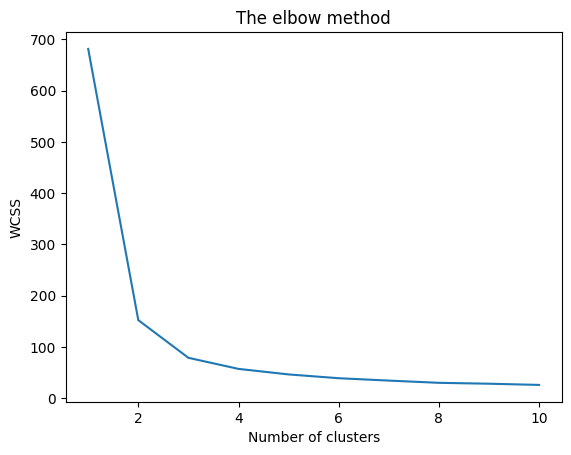

In [82]:

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [76]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [77]:
iris_cara = iris
iris_cara['clusters'] = y_kmeans
iris_cara

,sepal_length,sepal_width,petal_length,petal_width,species,clusters
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [78]:
iris_cara[['species', 'clusters']].value_counts(normalize=True)

species     clusters
setosa      0           0.333333
virginica   1           0.333333
versicolor  1           0.313333
            0           0.020000
Name: proportion, dtype: float64

In [79]:
0.093333+0.013333

0.106666

## Gráfico

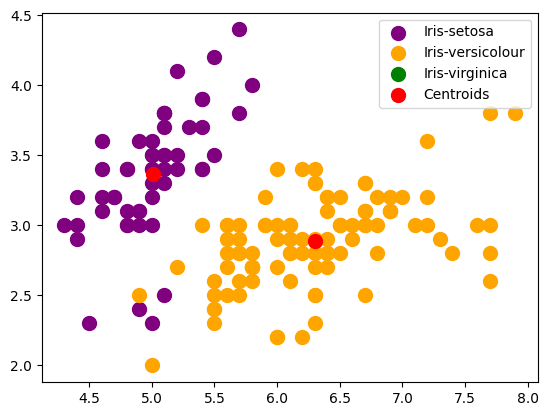

In [80]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [45]:
x[y_kmeans == 0, 0]

array([7. , 6.4, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1,
       5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 5.8, 4.9, 5.7, 5.8,
       6. , 5.6, 6.3, 6.2, 6.1, 6.3, 6. , 5.8, 6.3, 5.9])

In [39]:
x = iris.iloc[:, [0, 1, 2, 3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3